In [3]:
import warnings
warnings.filterwarnings("ignore")
import pickle as pk
import pandas as pd
import wordcloud as wc
import gensim as gs
import gensim.corpora as cp
import pyLDAvis.gensim
import pyLDAvis
import  matplotlib.pyplot as plt

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
covid_date = np.datetime64('2020-04-01T01:00:00.000000+0100')
n_topics = 5

# WordCloud

In [5]:
def word_cloud(df):
    all_words = ''
    for text in df['text']:
        all_words += ','.join(list(text)) 
        
    print('Total words {}'.format(len(all_words)))
    
    wordcloud = wc.WordCloud(background_color="white", max_words=100000, contour_width=4, scale=3, contour_color='steelblue')
    wordcloud.generate(all_words)
    return wordcloud.to_image()

# LDA

In [6]:
def lda(df, n_topics=5):
    all_words = []
    for text in df['text']:
        all_words.append(text)
    
    # Create dictionary and corpus
    word2num = cp.Dictionary(all_words)
    texts = all_words
    
    # Get term frequency
    corpus = [word2num.doc2bow(text) for text in texts]
    
    lda_model = gs.models.LdaMulticore(corpus=corpus, id2word=word2num, num_topics=n_topics)
    doc_lda = lda_model[corpus]
    
    print('\nTopics')
    print(lda_model.print_topics())
    
    print('\nScores')
    for i in range(0, len(corpus), 500):
        for index, score in sorted(lda_model[corpus[i]], key=lambda tup: -1*tup[1]):
            print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))
    
    pyLDAvis.enable_notebook()
    return pyLDAvis.gensim.prepare(lda_model, corpus, word2num)

# All

In [7]:
# Need to first get cleaned tokenized text data
uber_df_tk = pd.read_pickle(r'./data/uber_tk.p')

In [8]:
wcloud = word_cloud(uber_df_tk)

Total words 368139


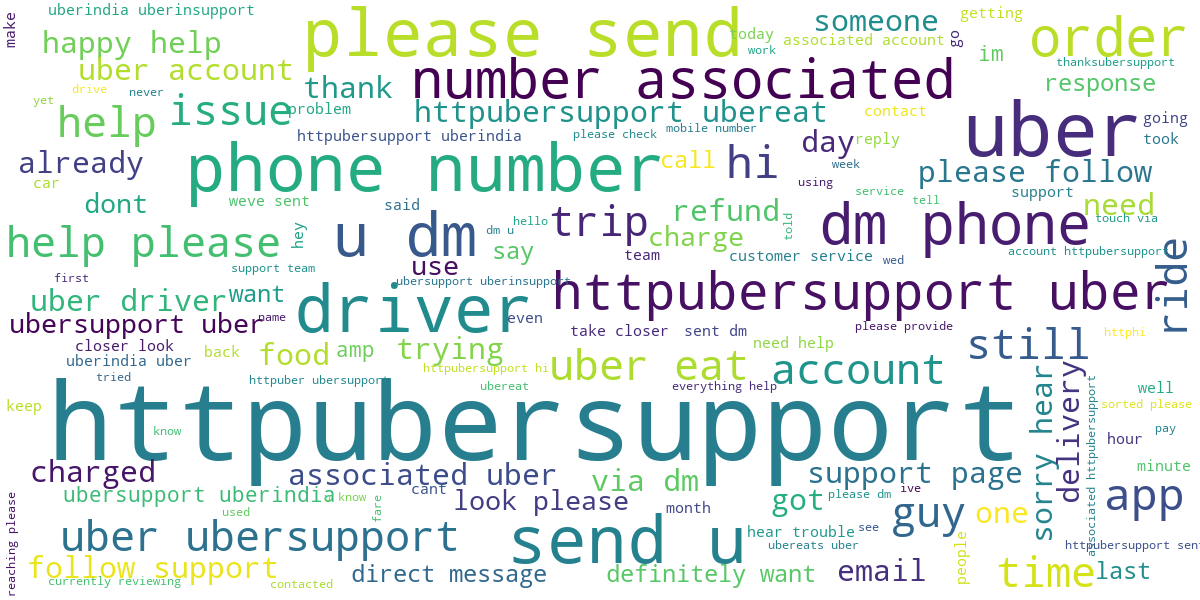

In [9]:
wcloud

In [10]:
LDAvis_prepared = lda(uber_df_tk, n_topics=n_topics)


Topics
[(0, '0.079*"ubersupport" + 0.053*"http" + 0.026*"uber" + 0.018*"please" + 0.015*"dm" + 0.014*"help" + 0.014*"ubereats" + 0.011*"u" + 0.011*"sent" + 0.009*"send"'), (1, '0.072*"http" + 0.056*"ubersupport" + 0.051*"uber" + 0.025*"please" + 0.022*"number" + 0.020*"u" + 0.020*"dm" + 0.020*"phone" + 0.017*"send" + 0.013*"driver"'), (2, '0.062*"ubersupport" + 0.052*"http" + 0.022*"dm" + 0.022*"please" + 0.014*"uber" + 0.013*"account" + 0.012*"u" + 0.011*"order" + 0.011*"help" + 0.011*"phone"'), (3, '0.084*"ubersupport" + 0.075*"http" + 0.041*"uber" + 0.017*"help" + 0.015*"please" + 0.011*"driver" + 0.011*"hi" + 0.009*"account" + 0.009*"uberindia" + 0.008*"u"'), (4, '0.095*"ubersupport" + 0.064*"http" + 0.022*"driver" + 0.022*"uber" + 0.013*"support" + 0.010*"uberindia" + 0.009*"help" + 0.008*"get" + 0.008*"dm" + 0.008*"ubereats"')]

Scores

Score: 0.749424934387207	 
Topic: 0.072*"http" + 0.056*"ubersupport" + 0.051*"uber" + 0.025*"please" + 0.022*"number" + 0.020*"u" + 0.020*"dm" +

Topic: 0.072*"http" + 0.056*"ubersupport" + 0.051*"uber" + 0.025*"please" + 0.022*"number" + 0.020*"u" + 0.020*"dm" + 0.020*"phone" + 0.017*"send" + 0.013*"driver"

Score: 0.015682470053434372	 
Topic: 0.079*"ubersupport" + 0.053*"http" + 0.026*"uber" + 0.018*"please" + 0.015*"dm" + 0.014*"help" + 0.014*"ubereats" + 0.011*"u" + 0.011*"sent" + 0.009*"send"

Score: 0.015659168362617493	 
Topic: 0.062*"ubersupport" + 0.052*"http" + 0.022*"dm" + 0.022*"please" + 0.014*"uber" + 0.013*"account" + 0.012*"u" + 0.011*"order" + 0.011*"help" + 0.011*"phone"

Score: 0.4817027747631073	 
Topic: 0.072*"http" + 0.056*"ubersupport" + 0.051*"uber" + 0.025*"please" + 0.022*"number" + 0.020*"u" + 0.020*"dm" + 0.020*"phone" + 0.017*"send" + 0.013*"driver"

Score: 0.4167281985282898	 
Topic: 0.062*"ubersupport" + 0.052*"http" + 0.022*"dm" + 0.022*"please" + 0.014*"uber" + 0.013*"account" + 0.012*"u" + 0.011*"order" + 0.011*"help" + 0.011*"phone"

Score: 0.03400041535496712	 
Topic: 0.079*"ubersupport" + 0.

In [11]:
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.036962  0.025764       1        1  25.081825
3     -0.044205  0.048247       2        1  22.489467
4     -0.071094 -0.030374       3        1  22.296329
0      0.031212 -0.067703       4        1  17.987536
2      0.047125  0.024066       5        1  12.144843, topic_info=            Term         Freq        Total Category  logprob  loglift
36            dm   701.000000   701.000000  Default  30.0000  30.0000
24   ubersupport  4016.000000  4016.000000  Default  29.0000  29.0000
40         phone   454.000000   454.000000  Default  28.0000  28.0000
39        number   476.000000   476.000000  Default  27.0000  27.0000
41        please   902.000000   902.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
42          send    37.809147   414.312301   Topic5  -5.1373  -0.2858
180       driver    42.197139   640.536809   Topic5  -5.0275  -0.6117
47           get    34.585598   323.051215   Topic5  -5.2264  -0.1261
153         ride    29.084972   229.788730   Topic5  -5.3996   0.0413
92     uberindia    25.016534   301.422095   Topic5  -5.5503  -0.3807

[412 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
458       1  0.013371           able
458       2  0.280792           able
458       3  0.173823           able
458       4  0.441244           able
458       5  0.093597           able
...     ...       ...            ...
4181      5  0.847228  wonderwheeled
457       3  0.780476          youve
457       4  0.070952          youve
457       5  0.070952          youve
1481      5  0.796103           zaid

[794 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 5, 1, 3])

In [12]:
pyLDAvis.save_html(LDAvis_prepared,'./html/all_lda_n{}.html'.format(n_topics))

# To Uber

In [13]:
to_uber_df_tk = uber_df_tk[uber_df_tk['target'] == 'Uber_Support']

In [14]:
to_uber_df_tk

,source,source_id,target,target_id,type_of_content,created_at,all_data,text
4,SatishInnov8,722043526461145088,Uber_Support,2815754953,Reply,2019-12-09 17:11:51,{'created_at': 'Mon Dec 09 17:11:51 +0000 2019...,"[ubersupport, wish, respectfully, state, regul..."
15,James_Carleton,247005181,Uber_Support,2815754953,Reply,2019-12-28 03:34:47,{'created_at': 'Sat Dec 28 03:34:47 +0000 2019...,"[ubersupport, ubereats, mcdonaldscanada, hi, t..."
18,SajeshSreejayan,96289683,Uber_Support,2815754953,Reply,2019-12-28 06:53:00,{'created_at': 'Sat Dec 28 06:53:00 +0000 2019...,"[ubersupport, awesome, partner, asks, destinat..."
19,iVigneshSuresh,59047875,Uber_Support,2815754953,Reply,2019-12-28 09:56:17,{'created_at': 'Sat Dec 28 09:56:17 +0000 2019...,"[ubersupport, ubersupport, uberindia, apart, s..."
20,iVigneshSuresh,59047875,Uber_Support,2815754953,Reply,2019-12-28 09:56:17,{'created_at': 'Sat Dec 28 09:56:17 +0000 2019...,"[ubersupport, ubersupport, uberindia, apart, s..."
...,...,...,...,...,...,...,...,...
5562,Iam_bahuguna,1094093461631000576,Uber_Support,2815754953,Reply,2021-03-31 17:09:05,{'created_at': 'Wed Mar 31 17:09:05 +0000 2021...,"[ubersupport, refused, move, even, minute, ask..."
5563,ajb_neuk,1344742630731747328,Uber_Support,2815754953,Reply,2021-03-31 17:15:48,{'created_at': 'Wed Mar 31 17:15:48 +0000 2021...,"[ubersupport, yeah, cause, link, useful, suppo..."
5564,AdrianMatache7,1376698104028794882,Uber_Support,2815754953,Reply,2021-03-31 17:18:34,{'created_at': 'Wed Mar 31 17:18:34 +0000 2021...,"[ubersupport, hi, guy, long, take, bank, accou..."
5565,k_sovs,1369169148580823040,Uber_Support,2815754953,Reply,2021-03-31 17:19:01,{'created_at': 'Wed Mar 31 17:19:01 +0000 2021...,"[ubersupport, filled, form, many, time, response]"


In [15]:
wcloud = word_cloud(to_uber_df_tk)

Total words 202701


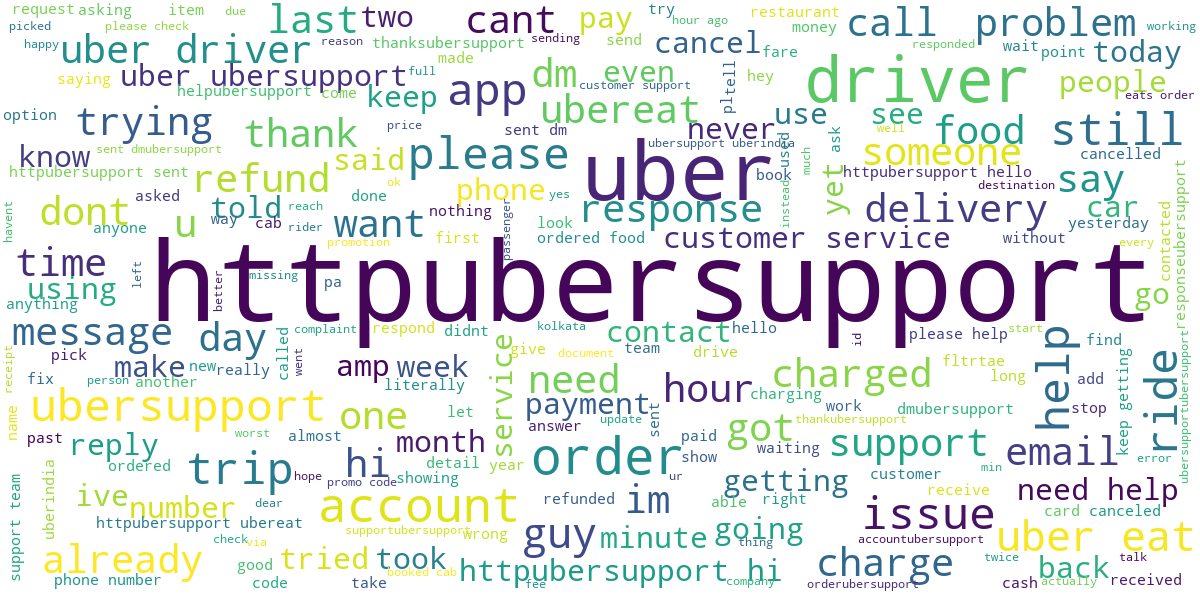

In [16]:
wcloud

In [17]:
LDAvis_prepared = lda(to_uber_df_tk, n_topics=n_topics)


Topics
[(0, '0.084*"ubersupport" + 0.056*"http" + 0.052*"uber" + 0.021*"driver" + 0.012*"account" + 0.010*"help" + 0.009*"eats" + 0.008*"need" + 0.008*"app" + 0.007*"service"'), (1, '0.091*"ubersupport" + 0.053*"http" + 0.021*"uber" + 0.017*"issue" + 0.012*"please" + 0.010*"contact" + 0.009*"order" + 0.008*"service" + 0.007*"trying" + 0.007*"get"'), (2, '0.114*"ubersupport" + 0.066*"http" + 0.027*"uber" + 0.012*"support" + 0.011*"order" + 0.011*"dm" + 0.010*"driver" + 0.009*"help" + 0.009*"please" + 0.007*"account"'), (3, '0.097*"ubersupport" + 0.051*"http" + 0.013*"driver" + 0.012*"uber" + 0.011*"get" + 0.009*"trip" + 0.008*"help" + 0.008*"please" + 0.008*"message" + 0.007*"order"'), (4, '0.105*"ubersupport" + 0.062*"http" + 0.032*"uber" + 0.018*"driver" + 0.011*"help" + 0.010*"order" + 0.009*"account" + 0.009*"food" + 0.008*"get" + 0.008*"one"')]

Scores

Score: 0.9373530149459839	 
Topic: 0.105*"ubersupport" + 0.062*"http" + 0.032*"uber" + 0.018*"driver" + 0.011*"help" + 0.010*"ord

In [18]:
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.002840 -0.017045       1        1  28.961432
4     -0.031341  0.007522       2        1  26.475344
0     -0.058333  0.023798       3        1  15.706674
1      0.024266 -0.066983       4        1  15.130783
3      0.062568  0.052708       5        1  13.725768, topic_info=            Term         Freq        Total Category  logprob  loglift
7           uber   846.000000   846.000000  Default  30.0000  30.0000
95         issue   140.000000   140.000000  Default  29.0000  29.0000
8    ubersupport  2932.000000  2932.000000  Default  28.0000  28.0000
217      contact    73.000000    73.000000  Default  27.0000  27.0000
121       driver   402.000000   402.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
897        thank    14.735055    62.526883   Topic5  -5.5976   0.5405
169         food    15.117738   112.522022   Topic5  -5.5720  -0.0214
51            dm    16.268946   179.424748   Topic5  -5.4986  -0.4146
47          hour    13.661244   117.766130   Topic5  -5.6733  -0.1682
167      support    13.390978   172.293746   Topic5  -5.6933  -0.5687

[414 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
3495      3  0.728429   absurd
69        1  0.263741  account
69        2  0.310011  account
69        3  0.245233  account
69        4  0.129557  account
...     ...       ...      ...
1408      1  0.125999     yall
1408      2  0.251998     yall
1408      5  0.503996     yall
384       2  0.943973    youve
2806      5  0.752613     zoom

[790 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 1, 2, 4])

In [19]:
pyLDAvis.save_html(LDAvis_prepared,'./html/to_lda_n{}.html'.format(n_topics))

# From Uber

In [20]:
from_uber_df_tk = uber_df_tk[uber_df_tk['source'] == 'Uber_Support']

In [21]:
from_uber_df_tk

,source,source_id,target,target_id,type_of_content,created_at,all_data,text
0,Uber_Support,2815754953,wordofbrandon,2566081240,Reply,2019-08-31 10:53:53,{'created_at': 'Sat Aug 31 10:53:53 +0000 2019...,"[wordofbrandon, thanks, bringing, attention, w..."
1,Uber_Support,2815754953,wordofbrandon,2566081240,Reply,2019-08-31 10:53:53,{'created_at': 'Sat Aug 31 10:53:53 +0000 2019...,"[wordofbrandon, thanks, bringing, attention, w..."
2,Uber_Support,2815754953,CapeVgirl,719534538,Reply,2019-10-01 07:45:30,{'created_at': 'Tue Oct 01 07:45:30 +0000 2019...,"[capevgirl, help, suggest, restarting, app, wo..."
3,Uber_Support,2815754953,CapeVgirl,719534538,Reply,2019-10-01 07:45:30,{'created_at': 'Tue Oct 01 07:45:30 +0000 2019...,"[capevgirl, help, suggest, restarting, app, wo..."
5,Uber_Support,2815754953,realchetty,28766827,Reply,2019-12-20 12:02:54,{'created_at': 'Fri Dec 20 12:02:54 +0000 2019...,"[realchetty, definitely, want, ensure, address..."
...,...,...,...,...,...,...,...,...
5551,Uber_Support,2815754953,CVREENSWORLD,1352048476339761153,Reply,2021-03-31 16:54:36,{'created_at': 'Wed Mar 31 16:54:36 +0000 2021...,"[cvreensworld, hi, cvreeny, happy, help, pleas..."
5552,Uber_Support,2815754953,makaylabez,303867642,Reply,2021-03-31 16:55:35,{'created_at': 'Wed Mar 31 16:55:35 +0000 2021...,"[makaylabez, happy, help, makayla, please, sen..."
5553,Uber_Support,2815754953,ajb_neuk,1344742630731747328,Reply,2021-03-31 16:55:49,{'created_at': 'Wed Mar 31 16:55:49 +0000 2021...,"[ajbneuk, hi, happy, help, please, follow, sup..."
5554,Uber_Support,2815754953,Nezz911,429610920,Reply,2021-03-31 16:57:30,{'created_at': 'Wed Mar 31 16:57:30 +0000 2021...,"[hi, neo, assist]"


In [22]:
wcloud = word_cloud(from_uber_df_tk)

Total words 81444


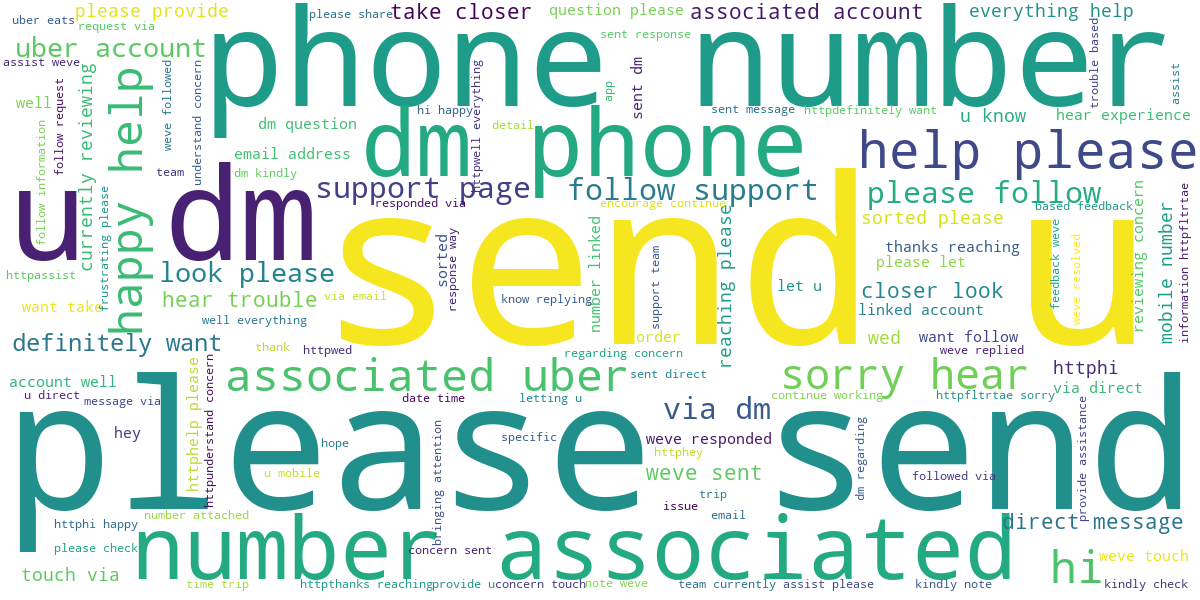

In [23]:
wcloud

In [24]:
LDAvis_prepared = lda(from_uber_df_tk, n_topics=n_topics)


Topics
[(0, '0.078*"http" + 0.034*"help" + 0.026*"please" + 0.022*"u" + 0.020*"dm" + 0.019*"hey" + 0.017*"follow" + 0.016*"via" + 0.015*"hi" + 0.014*"phone"'), (1, '0.081*"http" + 0.059*"please" + 0.040*"help" + 0.037*"u" + 0.036*"number" + 0.035*"dm" + 0.027*"send" + 0.027*"phone" + 0.027*"account" + 0.024*"hi"'), (2, '0.066*"http" + 0.047*"u" + 0.035*"dm" + 0.034*"like" + 0.028*"phone" + 0.028*"please" + 0.025*"number" + 0.024*"send" + 0.023*"look" + 0.021*"wed"'), (3, '0.069*"dm" + 0.048*"weve" + 0.047*"please" + 0.029*"u" + 0.027*"via" + 0.027*"http" + 0.022*"check" + 0.020*"send" + 0.019*"sent" + 0.019*"want"'), (4, '0.072*"http" + 0.056*"please" + 0.056*"u" + 0.048*"send" + 0.043*"phone" + 0.042*"number" + 0.041*"dm" + 0.028*"associated" + 0.020*"message" + 0.018*"help"')]

Scores

Score: 0.9179347157478333	 
Topic: 0.078*"http" + 0.034*"help" + 0.026*"please" + 0.022*"u" + 0.020*"dm" + 0.019*"hey" + 0.017*"follow" + 0.016*"via" + 0.015*"hi" + 0.014*"phone"

Score: 0.02079729549

In [25]:
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.014043  0.047755       1        1  34.529056
4      0.004899  0.061344       2        1  25.693409
3      0.115253 -0.039710       3        1  15.179800
2     -0.026595 -0.010783       4        1  12.797283
0     -0.079514 -0.058606       5        1  11.800451, topic_info=           Term        Freq       Total Category  logprob  loglift
248        weve  191.000000  191.000000  Default  30.0000  30.0000
3          http  850.000000  850.000000  Default  29.0000  29.0000
142        like  103.000000  103.000000  Default  28.0000  28.0000
25           dm  497.000000  497.000000  Default  27.0000  27.0000
109       check   67.000000   67.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
142        like   13.212145  103.978742   Topic5  -4.7122   0.0740
31         send   17.730504  366.163786   Topic5  -4.4180  -0.8908
273        page    9.657516   80.825097   Topic5  -5.0256   0.0125
59   associated   10.121581  234.720336   Topic5  -4.9787  -1.0067
217       happy    9.256363  114.256550   Topic5  -5.0680  -0.3761

[357 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
237       1  0.234263        able
237       2  0.234263        able
237       5  0.527092        able
61        1  0.111766  absolutely
61        2  0.391183  absolutely
...     ...       ...         ...
241       1  0.034973       would
241       4  0.699469       would
241       5  0.244814       would
207       1  0.914391      yepwbk
908       3  0.635997    zureenas

[561 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 4, 3, 1])

In [26]:
pyLDAvis.save_html(LDAvis_prepared,'./html/from_lda_n{}.html'.format(n_topics))

# To Uber Pre-COVID

In [27]:
pre_to_uber_df_tk = uber_df_tk[(uber_df_tk['target'] == 'Uber_Support') & (uber_df_tk['created_at'] <= covid_date)]

In [28]:
pre_to_uber_df_tk

,source,source_id,target,target_id,type_of_content,created_at,all_data,text
4,SatishInnov8,722043526461145088,Uber_Support,2815754953,Reply,2019-12-09 17:11:51,{'created_at': 'Mon Dec 09 17:11:51 +0000 2019...,"[ubersupport, wish, respectfully, state, regul..."
15,James_Carleton,247005181,Uber_Support,2815754953,Reply,2019-12-28 03:34:47,{'created_at': 'Sat Dec 28 03:34:47 +0000 2019...,"[ubersupport, ubereats, mcdonaldscanada, hi, t..."
18,SajeshSreejayan,96289683,Uber_Support,2815754953,Reply,2019-12-28 06:53:00,{'created_at': 'Sat Dec 28 06:53:00 +0000 2019...,"[ubersupport, awesome, partner, asks, destinat..."
19,iVigneshSuresh,59047875,Uber_Support,2815754953,Reply,2019-12-28 09:56:17,{'created_at': 'Sat Dec 28 09:56:17 +0000 2019...,"[ubersupport, ubersupport, uberindia, apart, s..."
20,iVigneshSuresh,59047875,Uber_Support,2815754953,Reply,2019-12-28 09:56:17,{'created_at': 'Sat Dec 28 09:56:17 +0000 2019...,"[ubersupport, ubersupport, uberindia, apart, s..."
...,...,...,...,...,...,...,...,...
655,ImAndreM,283383158,Uber_Support,2815754953,Reply,2019-12-31 23:27:48,{'created_at': 'Tue Dec 31 23:27:48 +0000 2019...,"[ubersupport, uber, eats, order, stuck, hour, ..."
656,Bigmanpfc,21190526,Uber_Support,2815754953,Reply,2019-12-31 23:31:15,{'created_at': 'Tue Dec 31 23:31:15 +0000 2019...,"[ubersupport, ask, different, wife, tweeted, r..."
657,hegemonprime,286568999,Uber_Support,2815754953,Reply,2019-12-31 23:51:09,{'created_at': 'Tue Dec 31 23:51:09 +0000 2019...,"[ubersupport, hey, trying, update, platform, i..."
658,jstocks21,1619318929,Uber_Support,2815754953,Reply,2019-12-31 23:51:59,{'created_at': 'Tue Dec 31 23:51:59 +0000 2019...,"[ubersupport, response, gotten, everyone, one,..."


In [29]:
wcloud = word_cloud(pre_to_uber_df_tk)

Total words 33251


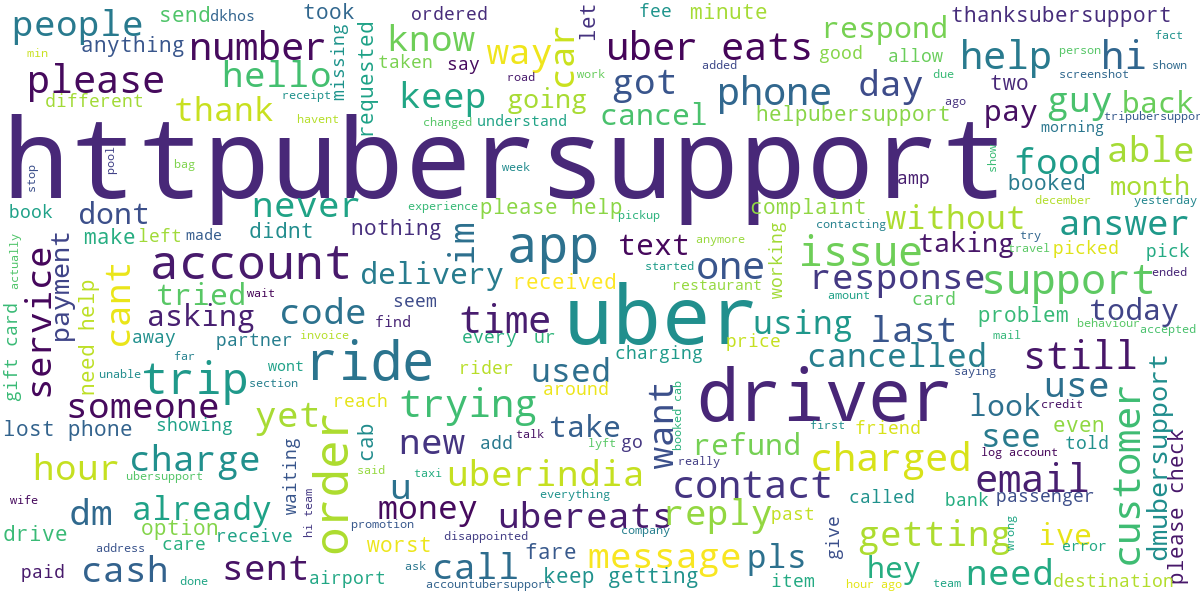

In [30]:
wcloud

In [31]:
LDAvis_prepared = lda(pre_to_uber_df_tk, n_topics=n_topics)


Topics
[(0, '0.056*"ubersupport" + 0.031*"http" + 0.013*"uber" + 0.009*"help" + 0.008*"people" + 0.007*"call" + 0.006*"hour" + 0.006*"yet" + 0.006*"contact" + 0.005*"get"'), (1, '0.092*"ubersupport" + 0.058*"http" + 0.020*"driver" + 0.012*"ride" + 0.011*"uber" + 0.010*"trip" + 0.008*"get" + 0.007*"account" + 0.007*"please" + 0.007*"app"'), (2, '0.030*"ubersupport" + 0.012*"http" + 0.010*"order" + 0.009*"please" + 0.009*"answer" + 0.008*"help" + 0.008*"call" + 0.006*"dm" + 0.006*"app" + 0.006*"trying"'), (3, '0.075*"ubersupport" + 0.055*"http" + 0.034*"uber" + 0.018*"driver" + 0.010*"ride" + 0.010*"getting" + 0.008*"support" + 0.007*"email" + 0.007*"order" + 0.007*"issue"'), (4, '0.085*"ubersupport" + 0.055*"http" + 0.040*"uber" + 0.014*"driver" + 0.011*"order" + 0.010*"account" + 0.009*"app" + 0.009*"help" + 0.009*"please" + 0.008*"phone"')]

Scores

Score: 0.9378538131713867	 
Topic: 0.075*"ubersupport" + 0.055*"http" + 0.034*"uber" + 0.018*"driver" + 0.010*"ride" + 0.010*"getting" +

In [32]:
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.031692  0.080706       1        1  35.710730
4      0.052145 -0.041429       2        1  31.236246
3      0.058302 -0.025885       3        1  21.388820
0     -0.074595 -0.029375       4        1   7.873625
2     -0.067545  0.015982       5        1   3.790578, topic_info=            Term        Freq       Total Category  logprob  loglift
8    ubersupport  388.000000  388.000000  Default  30.0000  30.0000
7           uber  119.000000  119.000000  Default  29.0000  29.0000
152        order   30.000000   30.000000  Default  28.0000  28.0000
90          help   34.000000   34.000000  Default  27.0000  27.0000
197         call   10.000000   10.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
157          see    0.557765    8.487800   Topic5  -5.7877   0.5502
330        drive    0.557615    6.068488   Topic5  -5.7880   0.8855
57         every    0.557460    5.314180   Topic5  -5.7883   1.0179
261         left    0.557161    4.813890   Topic5  -5.7888   1.1162
161          bag    0.557048    3.413814   Topic5  -5.7890   1.4597

[364 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
385       1  0.281318       able
385       2  0.468863       able
385       4  0.187545       able
385       5  0.093773       able
663       1  0.855752   absolute
...     ...       ...        ...
264       1  0.756330  yesterday
702       1  0.204323        yet
702       2  0.102162        yet
702       3  0.408646        yet
702       4  0.204323        yet

[554 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 4, 1, 3])

In [33]:
pyLDAvis.save_html(LDAvis_prepared,'./html/pre_to_lda_n5.html'.format(n_topics))

# To Uber Post-COVID

In [34]:
post_to_uber_df_tk = uber_df_tk[(uber_df_tk['target'] == 'Uber_Support') & (uber_df_tk['created_at'] > covid_date)]

In [35]:
post_to_uber_df_tk

,source,source_id,target,target_id,type_of_content,created_at,all_data,text
690,Arshdee12667790,1324955159395356672,Uber_Support,2815754953,Reply,2020-12-29 02:49:31,{'created_at': 'Tue Dec 29 02:49:31 +0000 2020...,"[ubersupport, used, work, southaustralia, move..."
695,AbdulRa10911356,1343811137159258112,Uber_Support,2815754953,Reply,2020-12-29 07:14:44,{'created_at': 'Tue Dec 29 07:14:44 +0000 2020...,"[ubersupport, sir, issue, driver, app, please,..."
696,AbdulRa10911356,1343811137159258112,Uber_Support,2815754953,Reply,2020-12-29 07:17:23,{'created_at': 'Tue Dec 29 07:17:23 +0000 2020...,"[ubersupport, driver, app, issue, please, help]"
699,ZaidAmir7,37367374,Uber_Support,2815754953,Reply,2020-12-29 08:36:09,{'created_at': 'Tue Dec 29 08:36:09 +0000 2020...,"[ubersupport, yeah, got, response, show, read,..."
700,ZaidAmir7,37367374,Uber_Support,2815754953,Reply,2020-12-29 08:37:44,{'created_at': 'Tue Dec 29 08:37:44 +0000 2020...,"[ubersupport, someone, somewhere, else, talk, ..."
...,...,...,...,...,...,...,...,...
5562,Iam_bahuguna,1094093461631000576,Uber_Support,2815754953,Reply,2021-03-31 17:09:05,{'created_at': 'Wed Mar 31 17:09:05 +0000 2021...,"[ubersupport, refused, move, even, minute, ask..."
5563,ajb_neuk,1344742630731747328,Uber_Support,2815754953,Reply,2021-03-31 17:15:48,{'created_at': 'Wed Mar 31 17:15:48 +0000 2021...,"[ubersupport, yeah, cause, link, useful, suppo..."
5564,AdrianMatache7,1376698104028794882,Uber_Support,2815754953,Reply,2021-03-31 17:18:34,{'created_at': 'Wed Mar 31 17:18:34 +0000 2021...,"[ubersupport, hi, guy, long, take, bank, accou..."
5565,k_sovs,1369169148580823040,Uber_Support,2815754953,Reply,2021-03-31 17:19:01,{'created_at': 'Wed Mar 31 17:19:01 +0000 2021...,"[ubersupport, filled, form, many, time, response]"


In [36]:
wcloud = word_cloud(from_uber_df_tk)

Total words 81444


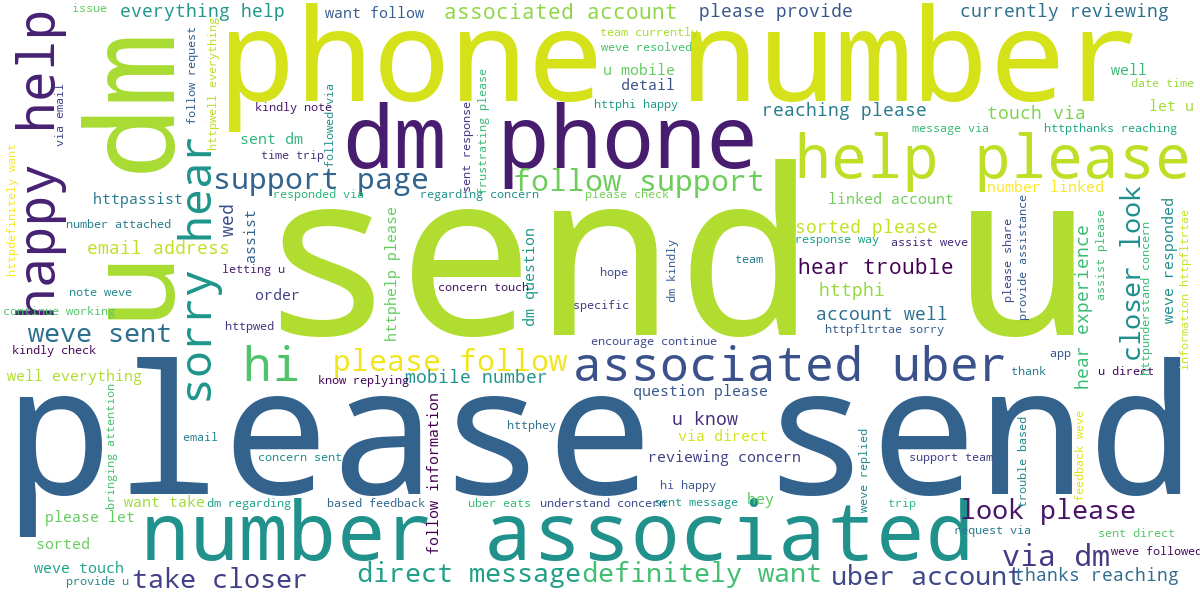

In [37]:
wcloud

In [38]:
LDAvis_prepared = lda(post_to_uber_df_tk, n_topics=n_topics)


Topics
[(0, '0.085*"ubersupport" + 0.054*"http" + 0.044*"uber" + 0.012*"get" + 0.012*"please" + 0.009*"time" + 0.009*"driver" + 0.009*"guy" + 0.009*"help" + 0.009*"account"'), (1, '0.088*"ubersupport" + 0.045*"http" + 0.024*"support" + 0.021*"uber" + 0.011*"driver" + 0.011*"account" + 0.010*"help" + 0.009*"please" + 0.008*"already" + 0.007*"like"'), (2, '0.119*"ubersupport" + 0.057*"http" + 0.017*"uber" + 0.017*"help" + 0.014*"driver" + 0.012*"need" + 0.011*"get" + 0.010*"dm" + 0.010*"order" + 0.008*"sent"'), (3, '0.107*"ubersupport" + 0.041*"http" + 0.029*"uber" + 0.013*"order" + 0.012*"driver" + 0.008*"account" + 0.008*"get" + 0.008*"keep" + 0.007*"dm" + 0.007*"sent"'), (4, '0.099*"ubersupport" + 0.082*"http" + 0.039*"uber" + 0.016*"driver" + 0.015*"order" + 0.008*"please" + 0.008*"ubereats" + 0.007*"uberindia" + 0.007*"trip" + 0.007*"service"')]

Scores

Score: 0.9258288145065308	 
Topic: 0.119*"ubersupport" + 0.057*"http" + 0.017*"uber" + 0.017*"help" + 0.014*"driver" + 0.012*"nee

In [39]:
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.004764 -0.025450       1        1  31.523654
4     -0.049314 -0.044165       2        1  28.017880
0      0.027230  0.042006       3        1  15.833334
3     -0.034720  0.053411       4        1  13.369369
1      0.061568 -0.025803       5        1  11.255763, topic_info=            Term         Freq        Total Category  logprob  loglift
5    ubersupport  2489.000000  2489.000000  Default  30.0000  30.0000
138      support   149.000000   149.000000  Default  29.0000  29.0000
50          uber   713.000000   713.000000  Default  28.0000  28.0000
1           http  1445.000000  1445.000000  Default  27.0000  27.0000
12          help   223.000000   223.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
37          time    11.649314   124.678385   Topic5  -5.4530  -0.1862
119        order    12.044784   240.021527   Topic5  -5.4196  -0.8078
13         issue    10.644048   108.524923   Topic5  -5.5432  -0.1377
81         still    10.369609   124.624744   Topic5  -5.5694  -0.3021
314         ride    10.077656   110.539785   Topic5  -5.5979  -0.2108

[414 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
3038      3  0.734690   absurd
0         1  0.271905  account
0         2  0.226587  account
0         3  0.186934  account
0         4  0.147282  account
...     ...       ...      ...
1679      5  0.551284     york
1148      1  0.115369    youre
1148      3  0.115369    youre
1148      4  0.461477    youre
1148      5  0.230739    youre

[805 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 1, 4, 2])

In [40]:
pyLDAvis.save_html(LDAvis_prepared,'./html/post_to_lda_n5.html'.format(n_topics))

# From Uber Pre-COVID

In [41]:
pre_from_uber_df_tk = uber_df_tk[(uber_df_tk['source'] == 'Uber_Support') & (uber_df_tk['created_at'] <= covid_date)]

In [42]:
pre_from_uber_df_tk

,source,source_id,target,target_id,type_of_content,created_at,all_data,text
0,Uber_Support,2815754953,wordofbrandon,2566081240,Reply,2019-08-31 10:53:53,{'created_at': 'Sat Aug 31 10:53:53 +0000 2019...,"[wordofbrandon, thanks, bringing, attention, w..."
1,Uber_Support,2815754953,wordofbrandon,2566081240,Reply,2019-08-31 10:53:53,{'created_at': 'Sat Aug 31 10:53:53 +0000 2019...,"[wordofbrandon, thanks, bringing, attention, w..."
2,Uber_Support,2815754953,CapeVgirl,719534538,Reply,2019-10-01 07:45:30,{'created_at': 'Tue Oct 01 07:45:30 +0000 2019...,"[capevgirl, help, suggest, restarting, app, wo..."
3,Uber_Support,2815754953,CapeVgirl,719534538,Reply,2019-10-01 07:45:30,{'created_at': 'Tue Oct 01 07:45:30 +0000 2019...,"[capevgirl, help, suggest, restarting, app, wo..."
5,Uber_Support,2815754953,realchetty,28766827,Reply,2019-12-20 12:02:54,{'created_at': 'Fri Dec 20 12:02:54 +0000 2019...,"[realchetty, definitely, want, ensure, address..."
...,...,...,...,...,...,...,...,...
651,Uber_Support,2815754953,lordsarcastico,141914172,Reply,2019-12-31 23:07:11,{'created_at': 'Tue Dec 31 23:07:11 +0000 2019...,"[lordsarcastico, take, closer, look, lordsarca..."
652,Uber_Support,2815754953,lordsarcastico,141914172,Reply,2019-12-31 23:07:11,{'created_at': 'Tue Dec 31 23:07:11 +0000 2019...,"[lordsarcastico, take, closer, look, lordsarca..."
654,Uber_Support,2815754953,Bigmanpfc,21190526,Reply,2019-12-31 23:26:05,{'created_at': 'Tue Dec 31 23:26:05 +0000 2019...,"[bigmanpfc, definitely, understand, concern, h..."
662,Uber_Support,2815754953,matdel69,1237136270767382529,Reply,2020-03-09 22:13:45,{'created_at': 'Mon Mar 09 22:13:45 +0000 2020...,"[absolutely, want, take, closer, look, please,..."


In [43]:
wcloud = word_cloud(pre_from_uber_df_tk)

Total words 7647


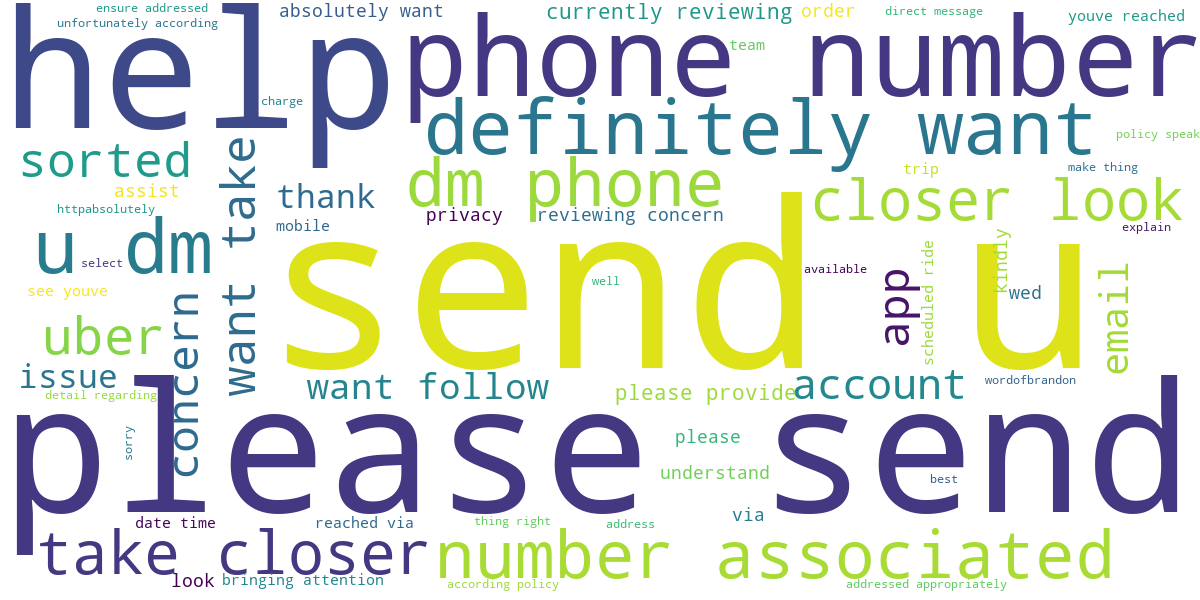

In [44]:
wcloud

In [45]:
LDAvis_prepared = lda(pre_from_uber_df_tk, n_topics=n_topics)


Topics
[(0, '0.052*"http" + 0.049*"help" + 0.045*"u" + 0.040*"please" + 0.036*"send" + 0.033*"number" + 0.030*"dm" + 0.025*"phone" + 0.020*"account" + 0.020*"assist"'), (1, '0.074*"http" + 0.044*"want" + 0.030*"please" + 0.025*"u" + 0.020*"closer" + 0.019*"take" + 0.019*"look" + 0.019*"definitely" + 0.016*"uber" + 0.016*"absolutely"'), (2, '0.059*"http" + 0.039*"want" + 0.032*"please" + 0.025*"ubervirgdetroit" + 0.025*"saheemkhizar" + 0.021*"u" + 0.021*"look" + 0.020*"number" + 0.019*"phone" + 0.019*"definitely"'), (3, '0.041*"http" + 0.027*"u" + 0.025*"definitely" + 0.019*"please" + 0.019*"help" + 0.018*"concern" + 0.018*"bigmanpfc" + 0.018*"understand" + 0.016*"closer" + 0.016*"look"'), (4, '0.077*"http" + 0.051*"u" + 0.044*"please" + 0.042*"send" + 0.036*"number" + 0.033*"dm" + 0.032*"phone" + 0.030*"want" + 0.028*"help" + 0.027*"definitely"')]

Scores

Score: 0.9194684624671936	 
Topic: 0.077*"http" + 0.051*"u" + 0.044*"please" + 0.042*"send" + 0.036*"number" + 0.033*"dm" + 0.032*

In [46]:
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.072774 -0.094909       1        1  40.813885
0     -0.101825  0.079959       2        1  21.489903
1      0.073380  0.016615       3        1  19.146188
2      0.041694 -0.006438       4        1  11.684385
3      0.059525  0.004773       5        1   6.865640, topic_info=                Term       Freq      Total Category  logprob  loglift
24              want  29.000000  29.000000  Default  30.0000  30.0000
19        definitely  20.000000  20.000000  Default  29.0000  29.0000
3               http  72.000000  72.000000  Default  28.0000  28.0000
10              help  28.000000  28.000000  Default  27.0000  27.0000
191  ubervirgdetroit   3.000000   3.000000  Default  26.0000  26.0000
..               ...        ...        ...      ...      ...      ...
96           provide   0.752170   6.137360   Topic5  -4.5982   0.5795
21             issue   0.751505   6.183622   Topic5  -4.5991   0.5711
41           privacy   0.751245   4.736057   Topic5  -4.5995   0.8374
127           policy   0.751194   5.481983   Topic5  -4.5995   0.6911
144              wed   0.750598   4.710851   Topic5  -4.6003   0.8419

[286 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
237       5  0.711726        able
61        1  0.142751  absolutely
61        2  0.142751  absolutely
61        3  0.428253  absolutely
61        4  0.285502  absolutely
...     ...       ...         ...
52        2  0.419446     working
52        4  0.419446     working
207       1  0.486581      yepwbk
207       4  0.486581      yepwbk
119       5  0.711876       youre

[332 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 2, 3, 4])

In [47]:
pyLDAvis.save_html(LDAvis_prepared,'./html/pre_from_lda_n5.html'.format(n_topics))

# From Uber Post-COVID

In [48]:
post_from_uber_df_tk = uber_df_tk[(uber_df_tk['source'] == 'Uber_Support') & (uber_df_tk['created_at'] > covid_date)]

In [49]:
post_from_uber_df_tk

,source,source_id,target,target_id,type_of_content,created_at,all_data,text
664,Uber_Support,2815754953,fltrtae,1242683484704915457,Reply,2020-10-17 10:27:36,{'created_at': 'Sat Oct 17 10:27:36 +0000 2020...,"[fltrtae, sorry, hear, experience, would, like..."
665,Uber_Support,2815754953,fltrtae,1242683484704915457,Reply,2020-10-17 10:27:36,{'created_at': 'Sat Oct 17 10:27:36 +0000 2020...,"[fltrtae, sorry, hear, experience, would, like..."
666,Uber_Support,2815754953,fltrtae,1242683484704915457,Reply,2020-10-17 10:27:36,{'created_at': 'Sat Oct 17 10:27:36 +0000 2020...,"[fltrtae, sorry, hear, experience, would, like..."
667,Uber_Support,2815754953,fltrtae,1242683484704915457,Reply,2020-10-17 10:27:36,{'created_at': 'Sat Oct 17 10:27:36 +0000 2020...,"[fltrtae, sorry, hear, experience, would, like..."
668,Uber_Support,2815754953,fltrtae,1242683484704915457,Reply,2020-10-17 10:27:36,{'created_at': 'Sat Oct 17 10:27:36 +0000 2020...,"[fltrtae, sorry, hear, experience, would, like..."
...,...,...,...,...,...,...,...,...
5551,Uber_Support,2815754953,CVREENSWORLD,1352048476339761153,Reply,2021-03-31 16:54:36,{'created_at': 'Wed Mar 31 16:54:36 +0000 2021...,"[cvreensworld, hi, cvreeny, happy, help, pleas..."
5552,Uber_Support,2815754953,makaylabez,303867642,Reply,2021-03-31 16:55:35,{'created_at': 'Wed Mar 31 16:55:35 +0000 2021...,"[makaylabez, happy, help, makayla, please, sen..."
5553,Uber_Support,2815754953,ajb_neuk,1344742630731747328,Reply,2021-03-31 16:55:49,{'created_at': 'Wed Mar 31 16:55:49 +0000 2021...,"[ajbneuk, hi, happy, help, please, follow, sup..."
5554,Uber_Support,2815754953,Nezz911,429610920,Reply,2021-03-31 16:57:30,{'created_at': 'Wed Mar 31 16:57:30 +0000 2021...,"[hi, neo, assist]"


In [50]:
wcloud = word_cloud(post_from_uber_df_tk)

Total words 73797


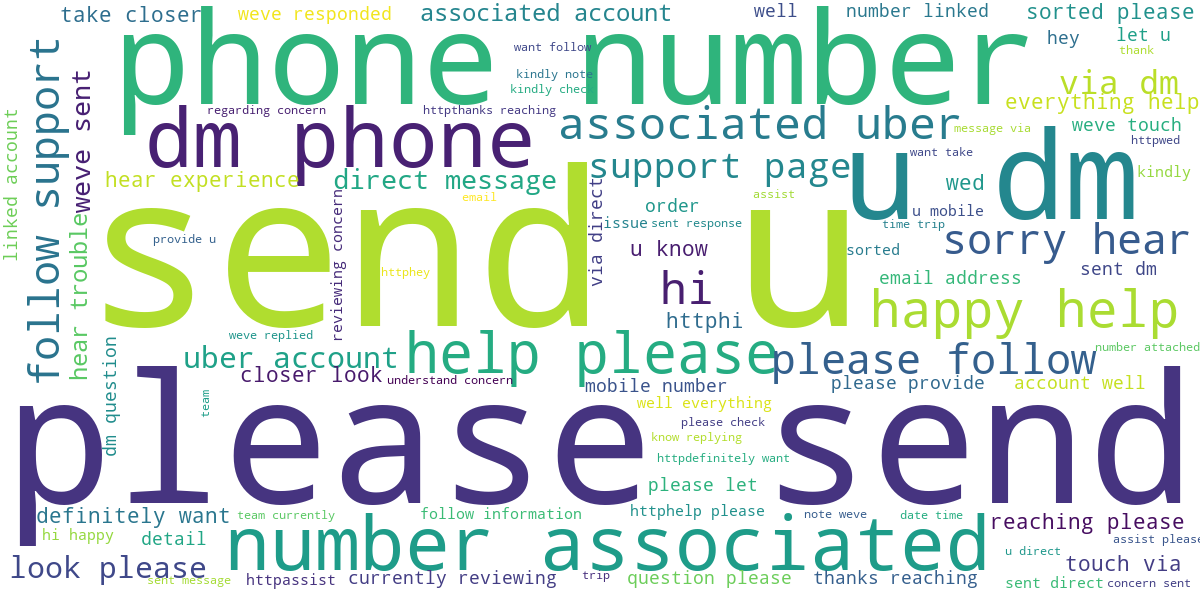

In [51]:
wcloud

In [52]:
LDAvis_prepared = lda(post_from_uber_df_tk, n_topics=n_topics)


Topics
[(0, '0.057*"http" + 0.056*"dm" + 0.038*"please" + 0.035*"number" + 0.035*"u" + 0.032*"send" + 0.031*"help" + 0.031*"phone" + 0.026*"weve" + 0.025*"associated"'), (1, '0.105*"http" + 0.060*"please" + 0.048*"help" + 0.032*"hi" + 0.032*"support" + 0.030*"happy" + 0.027*"u" + 0.027*"dm" + 0.026*"follow" + 0.026*"page"'), (2, '0.068*"http" + 0.051*"u" + 0.043*"please" + 0.042*"number" + 0.039*"dm" + 0.039*"send" + 0.039*"phone" + 0.029*"associated" + 0.021*"account" + 0.020*"help"'), (3, '0.060*"dm" + 0.047*"assist" + 0.037*"weve" + 0.035*"http" + 0.031*"via" + 0.028*"hi" + 0.028*"please" + 0.025*"u" + 0.020*"send" + 0.018*"thanks"'), (4, '0.062*"please" + 0.053*"http" + 0.049*"u" + 0.038*"dm" + 0.037*"number" + 0.035*"send" + 0.033*"phone" + 0.024*"account" + 0.024*"associated" + 0.022*"uber"')]

Scores

Score: 0.9191382527351379	 
Topic: 0.068*"http" + 0.051*"u" + 0.043*"please" + 0.042*"number" + 0.039*"dm" + 0.039*"send" + 0.039*"phone" + 0.029*"associated" + 0.021*"account" + 

In [53]:
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.049927  0.037736       1        1  29.302632
4      0.017401  0.056060       2        1  24.406027
1      0.039019 -0.090063       3        1  22.530703
0      0.007349  0.001902       4        1  12.638147
3     -0.113696 -0.005634       5        1  11.122491, topic_info=       Term        Freq       Total Category  logprob  loglift
78   assist  147.000000  147.000000  Default  30.0000  30.0000
19       dm  462.000000  462.000000  Default  29.0000  29.0000
82     page   73.000000   73.000000  Default  28.0000  28.0000
36     weve  180.000000  180.000000  Default  27.0000  27.0000
84  support  104.000000  104.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
76  message   11.303017  120.642179   Topic5  -4.7177  -0.1716
2    follow   11.898746  152.658257   Topic5  -4.6664  -0.3556
28  concern   10.039702  103.282057   Topic5  -4.8362  -0.1347
48     help   11.120446  277.767050   Topic5  -4.7340  -1.0218
22   number   11.394714  346.682291   Topic5  -4.7096  -1.2191

[375 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
643       5  0.711117  abkgardner
128       1  0.170012        able
128       3  0.056671        able
128       4  0.283353        able
128       5  0.453365        able
...     ...       ...         ...
137       5  0.098631     working
8         1  0.848871       would
8         2  0.033955       would
8         5  0.067910       would
72        5  0.795648        zaid

[602 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 2, 1, 4])

In [54]:
pyLDAvis.save_html(LDAvis_prepared,'./html/post_from_lda_n5.html'.format(n_topics))